In [2]:
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import cv2
import numpy as np


def loadImage(source):
    try:
        image = cv2.imread(source)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image

    except Exception as e:
        print(f"could not load image, err: {e}")
        return None


def show2images(image1, image2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image1)
    ax[0].set_title(title1)

    ax[1].imshow(image2)
    ax[1].set_title(title2)

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()


IMAGE_PATH = 'dataset/trim/IMG_2426.jpeg'
ORIGINAL_IMG = loadImage(IMAGE_PATH)
PIPELINE_IMG = ORIGINAL_IMG

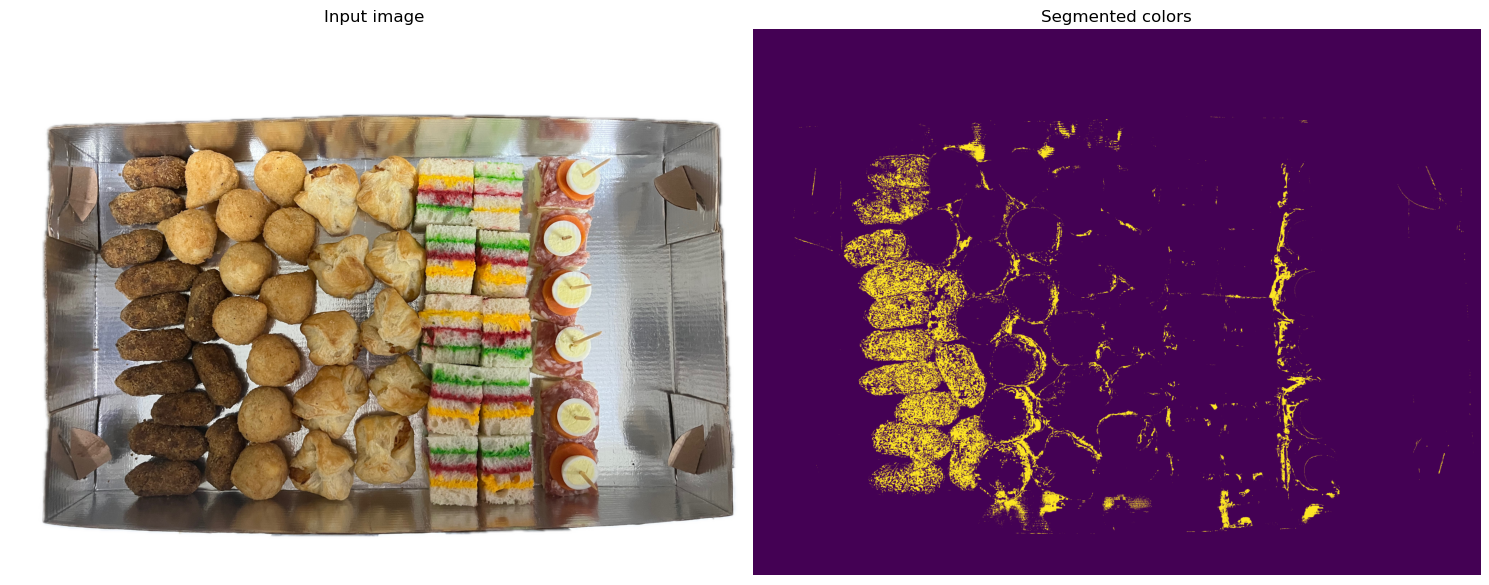

In [ ]:
def segmentByColor(image, lower_threshold, upper_threshold):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    PIPELINE_IMG = cv2.inRange(hsv_image, lower_threshold, upper_threshold)
    #PIPELINE_IMG = cv2.bitwise_and(PIPELINE_IMG, image, mask=mask)

    show2images(image, PIPELINE_IMG, 'Input image', 'Segmented colors')


#lower_t = np.array([8, 130, 10])
#upper_t = np.array([16, 150, 220])

lower_t = np.array([8, 130, 10])
upper_t = np.array([16, 180, 140])

segmentByColor(ORIGINAL_IMG, lower_t, upper_t)

In [ ]:
TODO: erodir, aumentar espaco entre elementos

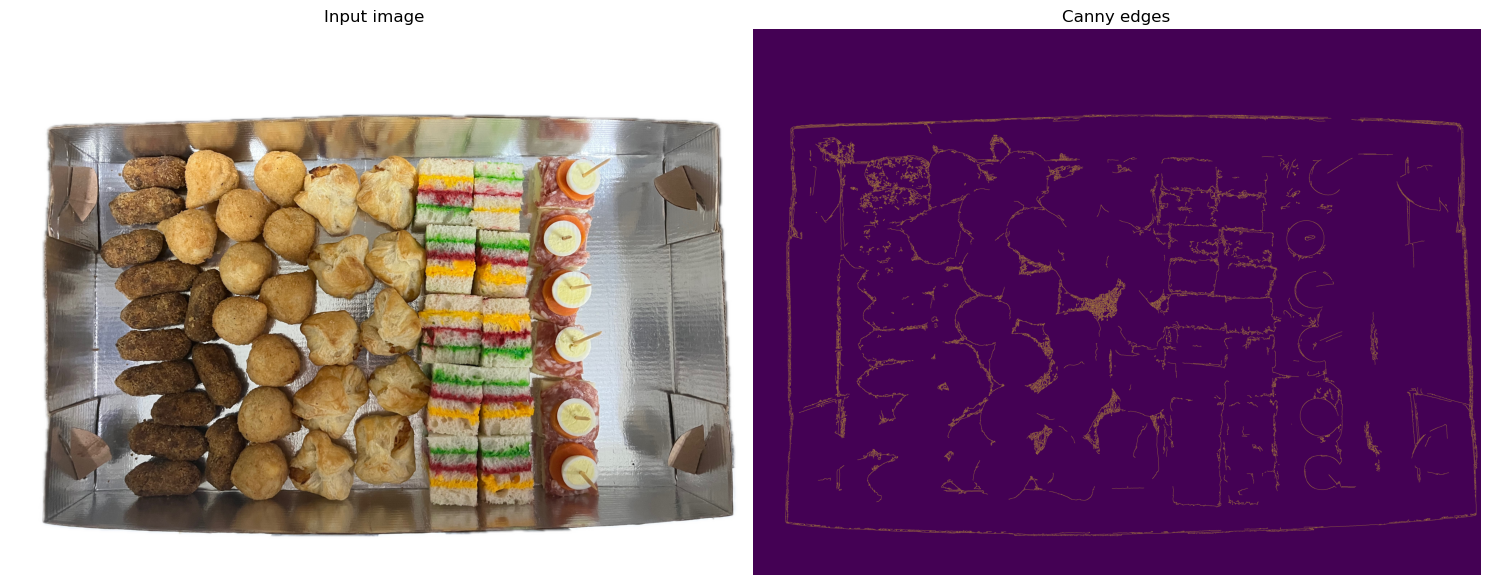

In [57]:
def applyCanny(image, threshold1, threshold2, apertureSize, L2gradient):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    blurred_image = cv2.bilateralFilter(gray_image, 50, 90, 90)
    #blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    PIPELINE_IMG = cv2.Canny(blurred_image, threshold1=threshold1, threshold2=threshold2, apertureSize=apertureSize, L2gradient=L2gradient) 

    show2images(image, PIPELINE_IMG, 'Input image', 'Canny edges')


#interact_manual(applyCanny, source=IMAGE_PATH, threshold1=65, threshold2=195, apertureSize=3, L2gradient=True)

# NOTE: best with gaussian blurred at 65/195
# or bilaterealFilter at 15/45
applyCanny(image=ORIGINAL_IMG, threshold1=15, threshold2=45, apertureSize=3, L2gradient=True)

Passo prévio de remoção de fundo. Optei por utilizar images já editadas de /trim

TODO: Não deveria estar cinza?

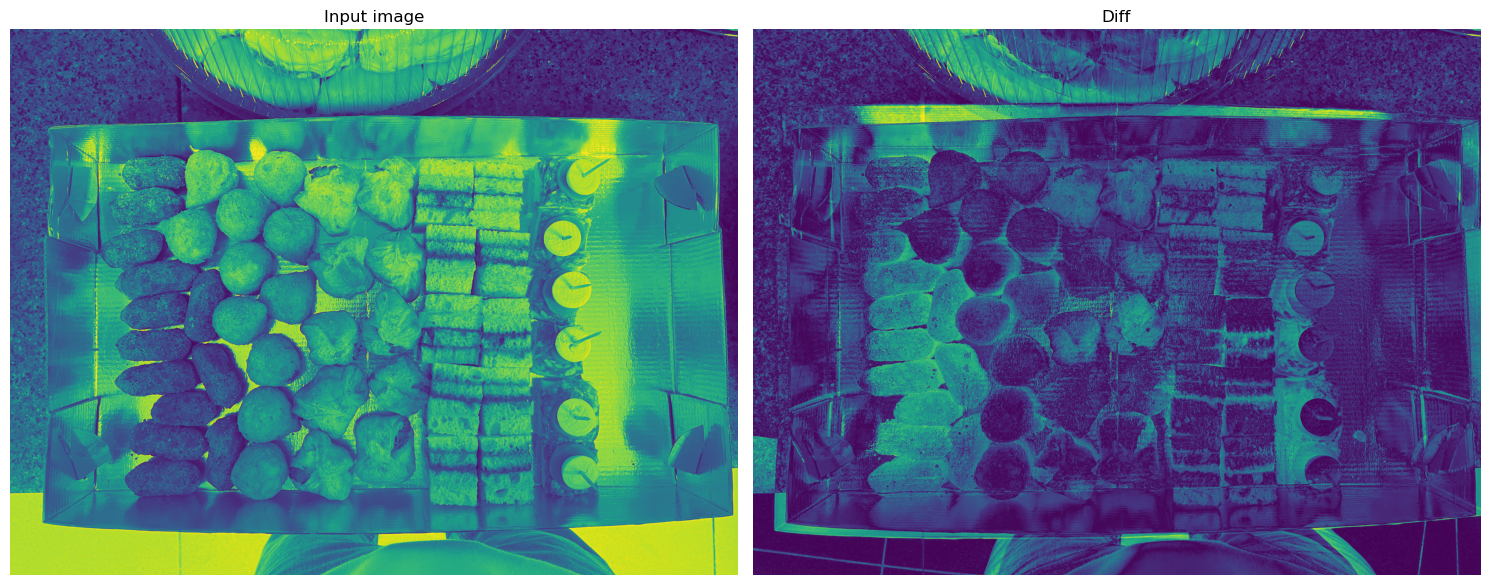

In [58]:
def removeBackground(source, ref_source):
    image = cv2.imread(source, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not load image.")
        return
    
    ref_image = cv2.imread(ref_source, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not load image.")
        return
    
    change = cv2.absdiff(image, ref_image)
    show2images(image, change, 'Input image', 'Diff')


removeBackground('dataset/jpeg/IMG_2426.jpeg', 'dataset/jpeg/IMG_2455.jpeg')

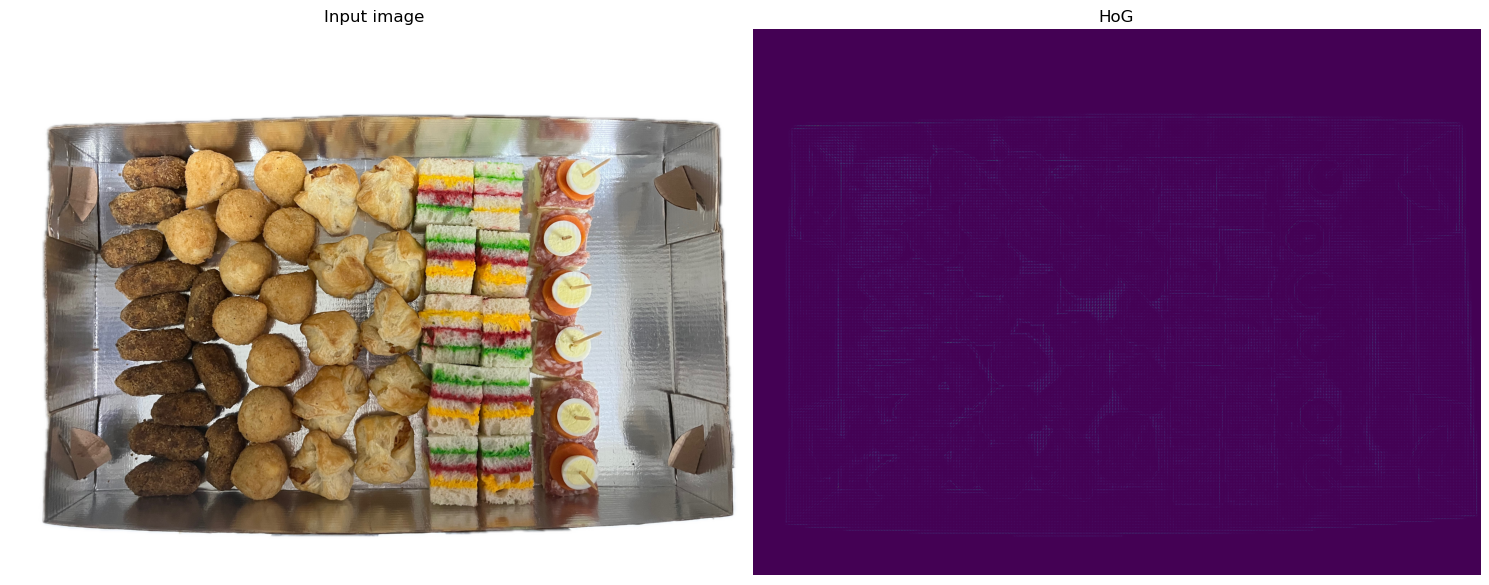

In [ ]:
from skimage import feature


def applyHoG(image, cell_size):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # NOTE: channel_axis=None for gray, else -1 or 0
    fd, hog_image = feature.hog(gray_image, orientations=8, pixels_per_cell=(cell_size, cell_size),
        cells_per_block=(1, 1), visualize=True, channel_axis=None)

    show2images(image, hog_image, 'Input image', 'HoG')


applyHoG(ORIGINAL_IMG, 16)    

In [ ]:
separacao por cor (segmentacao, tudo que é kibe vira branco, resto preto) -> erosao (pra separar objetos) -> dilatar (volta mesmo tamanho) -> deteccao de bordas -> hugh para circulos (contador de ilhas)